# Install and import libraries

In [8]:
%pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from pathlib import Path

# Read the files in the data dir

In [3]:
# Read all of the files in the data folder
files_in_folder = Path("data").rglob("*.csv")

files = [x for x in files_in_folder]
print([file for file in files])

[WindowsPath('data/1_raw_data_08-49_13.04.16.csv'), WindowsPath('data/1_raw_data_09-32_11.04.16.csv'), WindowsPath('data/1_raw_data_09-49_12.04.16.csv'), WindowsPath('data/1_raw_data_09-49_21.03.16.csv'), WindowsPath('data/1_raw_data_09-50_15.04.16.csv'), WindowsPath('data/1_raw_data_10-03_13.04.16.csv'), WindowsPath('data/1_raw_data_10-16_12.04.16.csv'), WindowsPath('data/1_raw_data_10-17_15.04.16.csv'), WindowsPath('data/1_raw_data_10-22_29.03.16.csv'), WindowsPath('data/1_raw_data_10-28_30.03.16.csv'), WindowsPath('data/1_raw_data_10-38_11.04.16.csv'), WindowsPath('data/1_raw_data_10-51_07.04.16.csv'), WindowsPath('data/1_raw_data_11-08_21.03.16.csv'), WindowsPath('data/1_raw_data_11-15_11.04.16.csv'), WindowsPath('data/1_raw_data_11-19_23.03.16.csv'), WindowsPath('data/1_raw_data_11-35_28.03.16.csv'), WindowsPath('data/1_raw_data_11-41_22.03.16.csv'), WindowsPath('data/1_raw_data_12-04_27.04.16.csv'), WindowsPath('data/1_raw_data_12-10_15.04.16.csv'), WindowsPath('data/1_raw_data_1

## Convert .csv(s) to dataframes and concatenate

In [4]:
# Read the data from the files
dfs = []

for file in files:
    df = pd.read_csv(str(file))
    dfs.append(df)
        
# Convert the data to a DataFrame
df = pd.concat([x for x in dfs], axis=0)

print(df.head())

# Print out the columns
# classes = {
#     "0": "unmarked",
#     "1": "rest",
#     "2": "clenched_fist",
#     "3": "wrist_flexion",
#     "4": "wrist_extension",
#     "5": "radial_deviations",
#     "6": "ulnar_deviations",
#     "7": "extended_palm"
# }
print(df.columns)

   channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0  -0.00001   0.00003  -0.00003   0.00001   0.00004   0.00001  -0.00002   
1  -0.00001  -0.00001  -0.00004  -0.00005  -0.00004  -0.00003  -0.00004   
2  -0.00002  -0.00001  -0.00003  -0.00003  -0.00003   0.00002  -0.00002   
3  -0.00002  -0.00001  -0.00003  -0.00003  -0.00003   0.00002  -0.00002   
4  -0.00002  -0.00001  -0.00003  -0.00003  -0.00003   0.00002  -0.00002   

   channel8  class  
0  -0.00004    0.0  
1  -0.00002    0.0  
2   0.00000    0.0  
3   0.00000    0.0  
4   0.00000    0.0  
Index(['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6',
       'channel7', 'channel8', 'class'],
      dtype='object')


## Scale and clean the data, then train the model

In [5]:
X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# filter for valid classes because the data is not clean
valid_classes = [0, 1, 2, 3, 4, 5, 6, 7]
mask_train = y_train.isin(valid_classes)
mask_test = y_test.isin(valid_classes)

# apply the mask to the training and testing data
X_train_filtered = X_train_scaled[mask_train]
y_train_filtered = y_train[mask_train]

X_test_filtered = X_test_scaled[mask_test]
y_test_filtered = y_test[mask_test]

# one hot encode the target data
y_train_categorical = to_categorical(y_train_filtered, num_classes=8)
y_test_categorical = to_categorical(y_test_filtered, num_classes=8)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_filtered.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='softmax'))  # Softmax for 8 output classes

# Compile the model with categorical crossentropy for multi-class classification
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the filtered training data
model.fit(X_train_filtered, y_train_categorical, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the filtered test set
test_loss, test_acc = model.evaluate(X_test_filtered, y_test_categorical)

print(f"Test accuracy: {test_acc}")

Epoch 1/5
42380/42380 [==============================] - 37s 864us/step - loss: 0.9714 - accuracy: 0.6414 - val_loss: 0.9174 - val_accuracy: 0.6425
Epoch 2/5
42380/42380 [==============================] - 37s 864us/step - loss: 0.9455 - accuracy: 0.6427 - val_loss: 0.9183 - val_accuracy: 0.6432
Epoch 3/5
42380/42380 [==============================] - 37s 866us/step - loss: 0.9414 - accuracy: 0.6426 - val_loss: 0.9259 - val_accuracy: 0.6433
Epoch 4/5
42380/42380 [==============================] - 37s 870us/step - loss: 0.9389 - accuracy: 0.6426 - val_loss: 0.9265 - val_accuracy: 0.6429
Epoch 5/5
26487/26487 [==============================] - 10s 374us/step - loss: 0.9343 - accuracy: 0.6443
Test accuracy: 0.6442539095878601


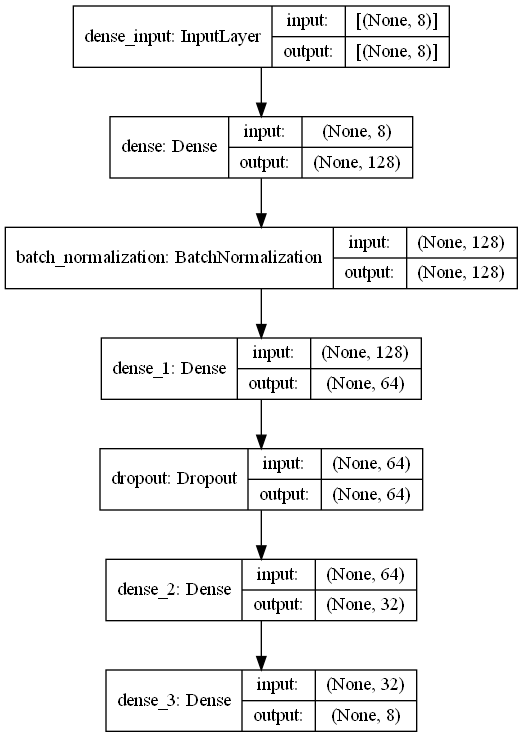

In [6]:
plot_model(model, to_file='model_visualisation.png', show_shapes=True, show_layer_names=True)

## Test on new data

In [7]:
# random example of new data
new_data = pd.DataFrame({
    'channel1': [0.00001],
    'channel2': [-0.00002],
    'channel3': [-0.00003],
    'channel4': [0.00001],
    'channel5': [-0.00001],
    'channel6': [0.00002],
    'channel7': [-0.00002],
    'channel8': [0.00000]
})

# scale the new data as we did with the training data
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

# use argmax to get the index of the predicted class
predicted_class = np.argmax(prediction, axis=1)

print(f"Predicted class: {predicted_class}")

Predicted class: [0]
